In [2]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../Mouse brain network/MouseBrainLib2.0')
import DataUtils as dutl
import random
from collections import deque
from matplotlib.gridspec import GridSpec

import seaborn as sns
sns.set_style("dark")

style_dict = sns.axes_style()
style_dict['xtick.bottom'] = True
style_dict['ytick.left'] = True
style_dict['xtick.color'] = '0'
style_dict['ytick.color'] = '0'
sns.set_style(style_dict)

import matplotlib.patches as mpatches
from matplotlib.cm import get_cmap
import networkx as nx

In [3]:
import matplotlib as mpl
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import matplotlib.transforms as mtransforms

mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

import matplotlib as mpl
import matplotlib.font_manager as fm

TEXT_FONT_SIZE = 6
TITLE_FONT_SIZE = 6.5
MARKER_SIZE = 2
LINE_WIDTH = 1

plt.rcParams['font.size'] = TEXT_FONT_SIZE 
plt.rcParams['axes.linewidth'] = 0.2
plt.rcParams['lines.linewidth'] = 2
mpl.rcParams['legend.fontsize'] = TEXT_FONT_SIZE 
mpl.rcParams['axes.titlesize'] = TITLE_FONT_SIZE 
mpl.rcParams['axes.labelsize'] = TEXT_FONT_SIZE 
plt.rcParams['axes.facecolor'] = '#F8F8F8'

color_cycle = ['#AA4499', '#332288', '#88CCEE', '#44AA99', '#117733', '#999933', '#DDCC77', '#CC6677', '#882255']

In [4]:
BASE_PATH = '/home/jupyter-avinash/ranjan_env_15_Feb_2023/Explosive Synchronization/Data collection/Mouse brain network/'
data1 = np.load(BASE_PATH + 'Cluster-formation-analysis/mb_data_adaptive_a_0.01_b_0.002_tr_1.npz')
data2 = np.load(BASE_PATH + 'Cluster-formation-analysis/mb_data_adaptive_a_0.01_b_0.002_tr_2.npz')
data3 = np.load(BASE_PATH + 'Cluster-formation-analysis/mb_data_adaptive_a_0.01_b_0.002_tr_3.npz')
data4 = np.load(BASE_PATH + 'Cluster-formation-analysis/mb_data_adaptive_a_0.01_b_0.002_tr_4.npz')

global_order_1 = data1['arr1']
theta_1 = data1['arr3']

global_order_2 = data2['arr1']
theta_2 = data2['arr3']

global_order_3 = data3['arr1']
theta_3 = data3['arr3']

global_order_4 = data4['arr1']
theta_4 = data4['arr3']

print("done")

done


In [5]:
transitoin_time_points_1 = [15700, 31480, 67600, 87910, 
                          117800, 171970, 258150, 299080, 371190]
transitoin_time_points_2 = [14960, 42600, 145340, 156140, 
                          161520, 187930, 194360, 233750, 257930, 327630, 349450, 369440]
transitoin_time_points_3 = [12460, 44330, 82760, 111840, 132780, 152120, 167820, 182210, 
                          190920, 215810, 234820, 271650, 281430, 305700, 326030, 373050, 383400]
transitoin_time_points_4 = [41440, 83660, 112120, 150440, 158350, 228240, 273250, 313840, 
                          333820, 360100, 360100, 368630, 377160, 390990]


tr_end_idxes = [9, 21, 38, 52]
subarrays = []
window_size = 1000

for t in transitoin_time_points_1:
    start_idx = t
    end_idx = start_idx + window_size
    subarrays.append(global_order_1[start_idx:end_idx])
    
for t in transitoin_time_points_2:
    start_idx = t
    end_idx = start_idx + window_size
    subarrays.append(global_order_2[start_idx:end_idx])
    
for t in transitoin_time_points_3:
    start_idx = t
    end_idx = start_idx + window_size
    subarrays.append(global_order_3[start_idx:end_idx])
    
for t in transitoin_time_points_4:
    start_idx = t
    end_idx = start_idx + window_size
    subarrays.append(global_order_4[start_idx:end_idx])

print("done")

done


In [6]:
mb_atlas = dutl.DataUtils()
print("done")

/home/jupyter-avinash/ranjan_env_15_Feb_2023/Explosive Synchronization/tES_mesoscale_connectivity_model/tES/Mouse brain network/MouseBrainLib2.0/mb_region_centroids.npz already exists
/home/jupyter-avinash/ranjan_env_15_Feb_2023/Explosive Synchronization/tES_mesoscale_connectivity_model/tES/Mouse brain network/MouseBrainLib2.0/mb_communities.npz already exists
test
done


In [7]:
labels = ["CR1", "MB", "CR2", "CR3", "HYP", "PONS/MD", "OLF/LS", "HPF/LS"]
community_labels = ["CR1", "MB", "CR2", "CR3", "HYP", "PONS/MD", "OLF/LS", "HPF/LS"]

In [8]:
data1 = np.load(BASE_PATH + 'algo_fragmentation_fixed/entry_time_stats-0.5.npz')
TIME_OF_ENTRY1 = data1["arr1"]
NODE_COMMUNITIES1 = data1["arr2"]
NODE_COMMUNITIES1 = NODE_COMMUNITIES1[:, :, 0:mb_atlas.N_REGIONS_WHOLE_BRAIN] # modified

data2 = np.load(BASE_PATH + 'algo_fragmentation_fixed/entry_time_stats-0.6.npz')
TIME_OF_ENTRY2 = data2["arr1"]
NODE_COMMUNITIES2 = data2["arr2"]
NODE_COMMUNITIES2 = NODE_COMMUNITIES2[:, :, 0:mb_atlas.N_REGIONS_WHOLE_BRAIN] # modified

data3 = np.load(BASE_PATH + 'algo_fragmentation_fixed/entry_time_stats-0.7.npz')
TIME_OF_ENTRY3 = data3["arr1"]
NODE_COMMUNITIES3 = data3["arr2"]
NODE_COMMUNITIES3 = NODE_COMMUNITIES3[:, :, 0:mb_atlas.N_REGIONS_WHOLE_BRAIN] # modified

data4 = np.load(BASE_PATH + 'algo_fragmentation_fixed/entry_time_stats-0.8.npz')
TIME_OF_ENTRY4 = data4["arr1"]
NODE_COMMUNITIES4 = data4["arr2"]
NODE_COMMUNITIES4 = NODE_COMMUNITIES4[:, :, 0:mb_atlas.N_REGIONS_WHOLE_BRAIN] # modified

print("done")

done


In [9]:
NODE_COMMITIES_BY_STRUCT = np.zeros(mb_atlas.N_REGIONS_WHOLE_BRAIN)

for community_id, nodes in mb_atlas.COMMUNITIES.items():
    for node in nodes:
        NODE_COMMITIES_BY_STRUCT[node] = community_id
print("done")

done


In [10]:
MAX_CLUSTER_ID = 1000
MIN_CLUSTER_ID = 1
COUNT_PER_COMMUNITY_BIGGEST_1 = np.zeros([len(subarrays), window_size,  MAX_CLUSTER_ID])
COUNT_PER_COMMUNITY_BIGGEST_2 = np.zeros([len(subarrays), window_size,  MAX_CLUSTER_ID])
COUNT_PER_COMMUNITY_BIGGEST_3 = np.zeros([len(subarrays), window_size,  MAX_CLUSTER_ID])
COUNT_PER_COMMUNITY_BIGGEST_4 = np.zeros([len(subarrays), window_size,  MAX_CLUSTER_ID])

COUNT_PER_COMMUNITY_1 = np.zeros([len(subarrays), window_size,  MAX_CLUSTER_ID])
COUNT_PER_COMMUNITY_2 = np.zeros([len(subarrays), window_size,  MAX_CLUSTER_ID])
COUNT_PER_COMMUNITY_3 = np.zeros([len(subarrays), window_size,  MAX_CLUSTER_ID])
COUNT_PER_COMMUNITY_4 = np.zeros([len(subarrays), window_size,  MAX_CLUSTER_ID])

for i in range(len(subarrays)): #len(subarrays)
    for t in range(window_size):
        # unique_values, value_counts = np.unique(NODE_COMMUNITIES1[i, t, :], return_counts=True)
        
        unique_values, value_counts = np.unique(NODE_COMMUNITIES1[i, t, :], return_counts=True)
        nonzero_indexes = np.nonzero(unique_values)[0]
        
        unique_values = unique_values[nonzero_indexes]
        value_counts = value_counts[nonzero_indexes]
        
        # for i in range(len(value_counts)):
        #     COUNT_PER_COMMUNITY_1[i, t, i] = value_counts[i]
        
        COUNT_PER_COMMUNITY_1[i, t, unique_values.astype(int)] = value_counts
        
        biggest_community_id = np.asarray([0])
        node_count = np.asarray([0])
        if len(value_counts) > 0:
            # print(unique_values, value_counts)
            biggest_community_id = unique_values[np.argmax(value_counts)]
            node_count = np.max(value_counts)
        
        COUNT_PER_COMMUNITY_BIGGEST_1[i, t, biggest_community_id.astype(int)] = node_count
        
        #- ------------------------------------
        unique_values, value_counts = np.unique(NODE_COMMUNITIES2[i, t, :], return_counts=True)
        nonzero_indexes = np.nonzero(unique_values)[0]
        
        unique_values = unique_values[nonzero_indexes]
        value_counts = value_counts[nonzero_indexes]
        
        # for i in range(len(value_counts)):
        #     COUNT_PER_COMMUNITY_2[i, t, i] = value_counts[i]
        
        COUNT_PER_COMMUNITY_2[i, t, unique_values.astype(int)] = value_counts
        
        biggest_community_id = np.asarray([0])
        node_count = np.asarray([0])
        if len(value_counts) > 0:
            # print(unique_values, value_counts)
            biggest_community_id = unique_values[np.argmax(value_counts)]
            node_count = np.max(value_counts)
        
        COUNT_PER_COMMUNITY_BIGGEST_2[i, t, biggest_community_id.astype(int)] = node_count
        
        
        #- ------------------------------------
        unique_values, value_counts = np.unique(NODE_COMMUNITIES3[i, t, :], return_counts=True)
        # print(unique_values, value_counts)
        nonzero_indexes = np.nonzero(unique_values)[0]
        
        unique_values = unique_values[nonzero_indexes]
        value_counts = value_counts[nonzero_indexes]
        
        # for i in range(len(value_counts)):
        #     COUNT_PER_COMMUNITY_3[i, t, i] = value_counts[i]
        
        COUNT_PER_COMMUNITY_3[i, t, unique_values.astype(int)] = value_counts
        
        biggest_community_id = np.asarray([0])
        node_count = np.asarray([0])
        if len(value_counts) > 0:
            biggest_community_id = unique_values[np.argmax(value_counts)]
            node_count = np.max(value_counts)
            
            
        COUNT_PER_COMMUNITY_BIGGEST_3[i, t, biggest_community_id.astype(int)] = node_count
        
        
        #- ------------------------------------
        unique_values, value_counts = np.unique(NODE_COMMUNITIES4[i, t, :], return_counts=True)
        nonzero_indexes = np.nonzero(unique_values)[0]
        
        unique_values = unique_values[nonzero_indexes]
        value_counts = value_counts[nonzero_indexes]
        
        # for i in range(len(value_counts)):
        #     COUNT_PER_COMMUNITY_4[i, t, i] = value_counts[i]
        
        COUNT_PER_COMMUNITY_4[i, t, unique_values.astype(int)] = value_counts
        
        biggest_community_id = np.asarray([0])
        node_count = np.asarray([0])
        if len(value_counts) > 0:
            # print(unique_values, value_counts)
            biggest_community_id = unique_values[np.argmax(value_counts)]
            node_count = np.max(value_counts)
        
        COUNT_PER_COMMUNITY_BIGGEST_4[i, t, biggest_community_id.astype(int)] = node_count

print("done")

done


- coloring nodes by area
- main sync cluster 52 transients - 4 plots for each threshold 
- sync cluster for 4 thresolds - 52 plots corresponding to 52 transients
- Put out degrees of transient (put dots)
- Remove superficial nodes

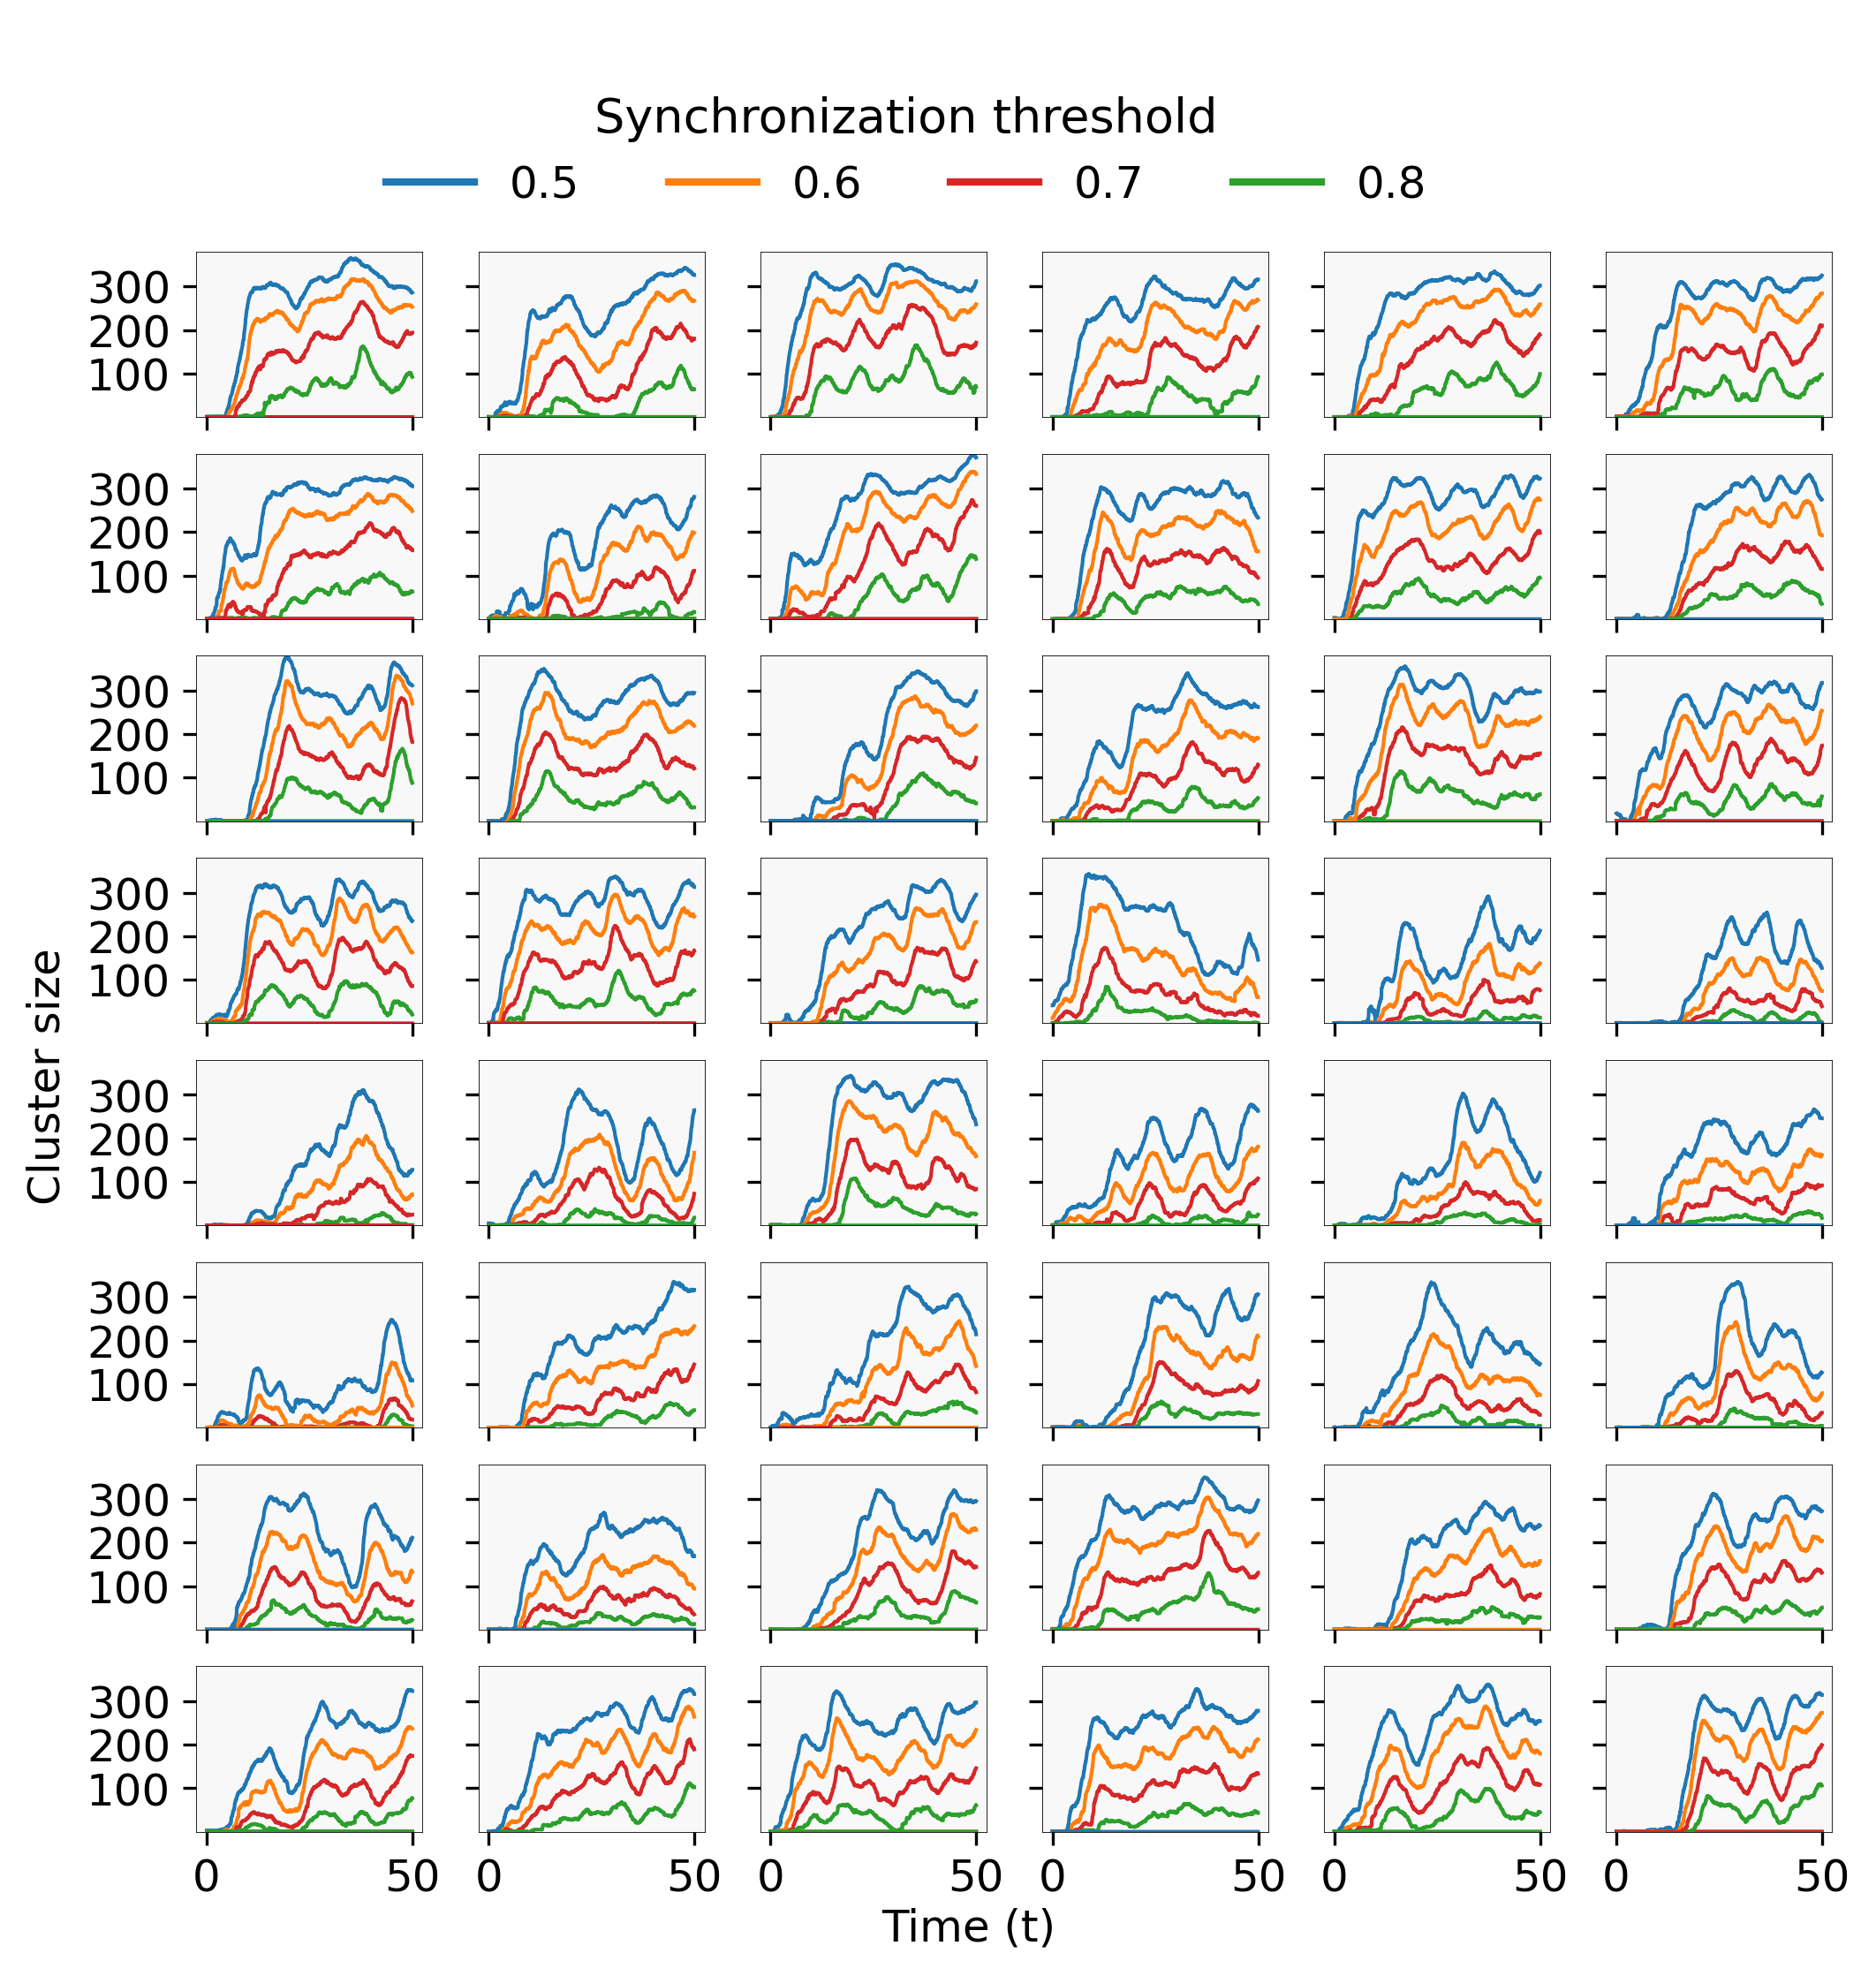

In [11]:
# Count per community different from node community

import matplotlib.pyplot as plt

DT = 0.05
fig, axes = plt.subplots(8, 6, figsize=(6.84, 6.4), dpi=300, sharex=True, sharey=True)

for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        t = i * 6 + j  # Calculate the index for accessing NODE_COMMUNITIES3
        
        if t >= 52:
            ax.set_axis_off()
            continue
        
#         if t < 47:
#             ax.set_xticks([])
            
#         if t%5 != 0:
#             ax.set_yticks([])
            
        ax.set_ylim(0.1, 380)
        
        for idx in range(MIN_CLUSTER_ID, MAX_CLUSTER_ID): 
            if np.max(COUNT_PER_COMMUNITY_BIGGEST_1[t, :, idx]) > 2:
                ax.plot(np.linspace(0, window_size-1, window_size)*DT, 
                        COUNT_PER_COMMUNITY_BIGGEST_1[t, :, idx], linewidth=LINE_WIDTH,
                        color="tab:blue", label="0.5_"+str(idx))
            
            if np.max(COUNT_PER_COMMUNITY_BIGGEST_2[t, :, idx]) > 2:
                ax.plot(np.linspace(0, window_size-1, window_size)*DT, 
                        COUNT_PER_COMMUNITY_BIGGEST_2[t, :, idx], linewidth=LINE_WIDTH, 
                        color="tab:orange",
                        label="0.6_"+str(idx))
             
            if np.max(COUNT_PER_COMMUNITY_BIGGEST_3[t, :, idx]) > 2:
                ax.plot(np.linspace(0, window_size-1, window_size)*DT, 
                        COUNT_PER_COMMUNITY_BIGGEST_3[t, :, idx], linewidth=LINE_WIDTH, 
                        color="tab:red",
                        label="0.7_"+str(idx))
            
            if np.max(COUNT_PER_COMMUNITY_BIGGEST_4[t, :, idx]) > 2:
                ax.plot(np.linspace(0, window_size-1, window_size)*DT, 
                        COUNT_PER_COMMUNITY_BIGGEST_4[t, :, idx], linewidth=LINE_WIDTH, 
                        color="tab:green",
                        label="0.8_"+str(idx))
                
            # ax.set_yscale('log')
            ax.tick_params(axis='y', labelsize=2*TEXT_FONT_SIZE)
            ax.tick_params(axis='x', labelsize=2*TEXT_FONT_SIZE)

# Adjust the spacing between subplots
plt.tight_layout()

# Set common x and y labels
fig.text(0.5, -0.01, 'Time (t)', ha='center', fontsize=2*TEXT_FONT_SIZE)
fig.text(-0.02, 0.5, 'Cluster size', va='center', rotation='vertical', fontsize=2*TEXT_FONT_SIZE)

# Create the common legend
legend_labels = ['0.5', '0.6', '0.7', '0.8']
legend_handles = [plt.Line2D([], [], color='tab:blue',  label='Label 1'),
                  plt.Line2D([], [], color='tab:orange',  label='Label 2'),
                  plt.Line2D([], [], color='tab:red',  label='Label 3'),
                  plt.Line2D([], [], color='tab:green', label='Label 3')]
common_legend = plt.figlegend(handles=legend_handles, labels=legend_labels, 
                              frameon=False,
                              fontsize=2*TEXT_FONT_SIZE,
                              loc='lower center', ncol=5)
common_legend.set_bbox_to_anchor((0.5, 1.02))  # Position the legend at the bottom center
common_legend.set_title(r'Synchronization threshold', 
                        prop={'size': 2*TITLE_FONT_SIZE})

# Show the plot
plt.show()

- Which nodes show less variablity in being part of the main sync cluster
- In each of 52 transients, how long does the nodes spend time being the part of main synchronization cluster?
- What is the variability in time spent by each node in the main sync cluster

In [12]:
MAX_CLUSTER_ID = 1000
MIN_CLUSTER_ID = 1
TIME_SPENT_IN_MAIN_SYNC_CLUSTER_1 = np.zeros([len(subarrays), mb_atlas.N_REGIONS_WHOLE_BRAIN])
TIME_SPENT_IN_MAIN_SYNC_CLUSTER_2 = np.zeros([len(subarrays), mb_atlas.N_REGIONS_WHOLE_BRAIN])
TIME_SPENT_IN_MAIN_SYNC_CLUSTER_3 = np.zeros([len(subarrays), mb_atlas.N_REGIONS_WHOLE_BRAIN])
TIME_SPENT_IN_MAIN_SYNC_CLUSTER_4 = np.zeros([len(subarrays), mb_atlas.N_REGIONS_WHOLE_BRAIN])
MAIN_SYNC_CLUSTER_EACH_TRANSIENT = np.zeros(len(subarrays))

# Main synchronization cluster for each transient
for i in range(len(subarrays)):
    
    # Main sync cluster corresponds to community id for biggest cluster at final epoch
    unique_values, value_counts = np.unique(NODE_COMMUNITIES1[i, 999, :], return_counts=True)
    nonzero_indexes = np.nonzero(unique_values)[0]
        
    unique_values = unique_values[nonzero_indexes]
    value_counts = value_counts[nonzero_indexes]
        
    biggest_community_id = np.asarray([0])
    node_count = np.asarray([0])
    if len(value_counts) > 0:
        biggest_community_id = unique_values[np.argmax(value_counts)]
        node_count = np.max(value_counts)
    
    MAIN_SYNC_CLUSTER_EACH_TRANSIENT[i] = biggest_community_id

# Calculate duration each node is part of main sync cluster in each of 52 transients for 4 thresholds
for i in range(len(subarrays)): #len(subarrays)
    for node in range(mb_atlas.N_REGIONS_WHOLE_BRAIN):
        
        TIME_SPENT_IN_MAIN_SYNC_CLUSTER_1[i, node] = np.count_nonzero(
            NODE_COMMUNITIES1[i, :, node] == MAIN_SYNC_CLUSTER_EACH_TRANSIENT[i])
        
        TIME_SPENT_IN_MAIN_SYNC_CLUSTER_2[i, node] = np.count_nonzero(
            NODE_COMMUNITIES2[i, :, node] == MAIN_SYNC_CLUSTER_EACH_TRANSIENT[i])
        
        TIME_SPENT_IN_MAIN_SYNC_CLUSTER_3[i, node] = np.count_nonzero(
            NODE_COMMUNITIES3[i, :, node] == MAIN_SYNC_CLUSTER_EACH_TRANSIENT[i])
        
        TIME_SPENT_IN_MAIN_SYNC_CLUSTER_4[i, node] = np.count_nonzero(
            NODE_COMMUNITIES4[i, :, node] == MAIN_SYNC_CLUSTER_EACH_TRANSIENT[i])

print("done")

done


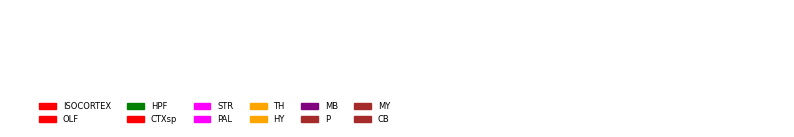

In [13]:
# Create a blank figure
f = plt.figure(figsize=(10, 1))

legend_patches = [mpatches.Patch(color=mb_atlas.WB_ANATOMICAL_AREAS_COLOR[c], 
                                 label=mb_atlas.WB_ANATOMICAL_AREAS[c]) for c in range(mb_atlas.WB_ANATOMICAL_AREAS_COUNT)]
plt.legend(handles=legend_patches, frameon=False, loc=1, bbox_to_anchor=(0.5, -0.1), ncol=6)
plt.axis('off')
plt.show()

# Time spent in main sync cluster for threshold of 0.5

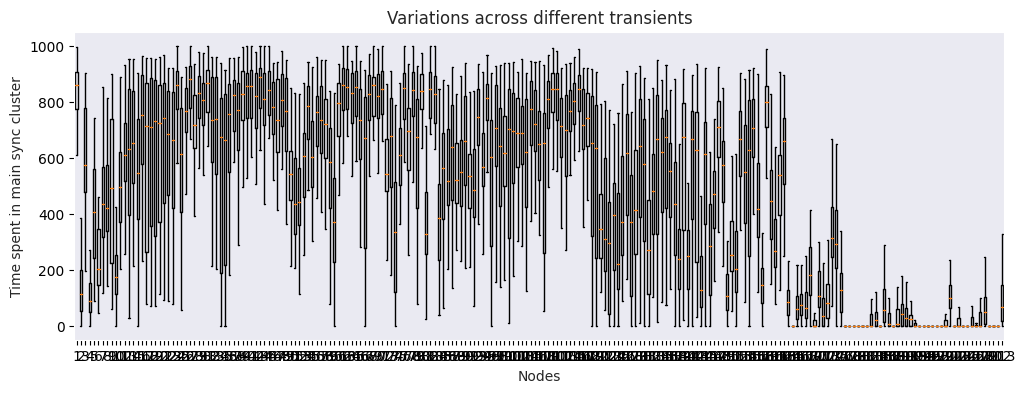

In [198]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.boxplot(TIME_SPENT_IN_MAIN_SYNC_CLUSTER_1[:, 0:es.N//2], showfliers=False)  
# Set labels and title
ax.set_xlabel("Nodes")
ax.set_ylabel("Time spent in main sync cluster")
ax.set_title("Variations across different transients")
plt.show()

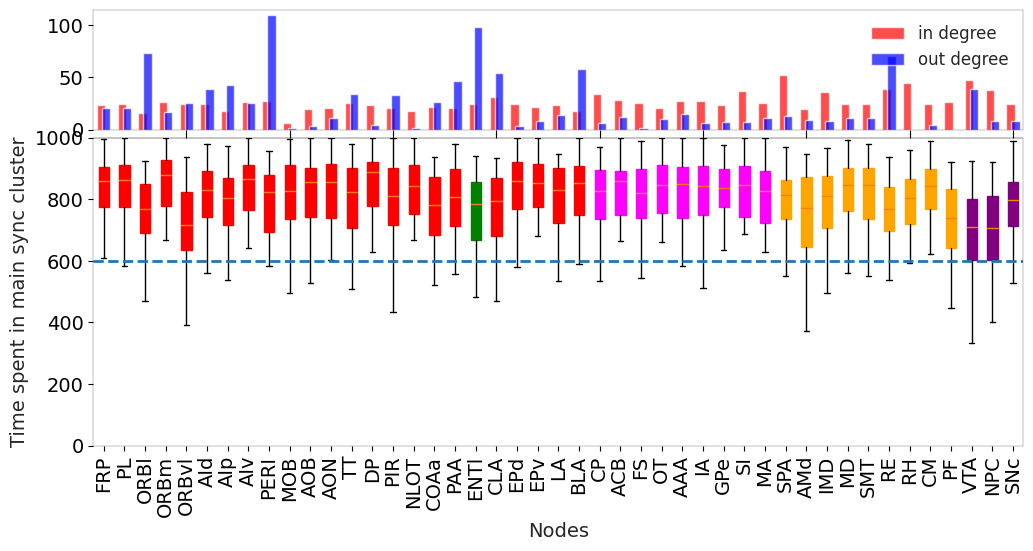

In [198]:
thr_time_spent = 700
thr_stdev_in_time_spent = 138

filtered_nodes_idx = []
mean_time_spent = np.median(TIME_SPENT_IN_MAIN_SYNC_CLUSTER_1, axis=0)
var_in_time_spent = np.var(TIME_SPENT_IN_MAIN_SYNC_CLUSTER_1, axis=0)

for node in range(mb_atlas.N_REGIONS_WHOLE_BRAIN//2):
    if (mean_time_spent[node] > thr_time_spent) and (np.sqrt(var_in_time_spent[node]) < thr_stdev_in_time_spent):
        filtered_nodes_idx.append(node)

filtered_nodes_idx = np.asarray(filtered_nodes_idx)

node_area_color = mb_atlas.NODE_ANATOMICAL_AREA_COLOR[filtered_nodes_idx]

# Create box plot
fig, ax = plt.subplots(figsize=(12, 4))
box_plot = ax.boxplot(TIME_SPENT_IN_MAIN_SYNC_CLUSTER_1[:, filtered_nodes_idx], 
                      showfliers=False, patch_artist=True, )  # Transpose the data to have nodes as x-axis

for idx, box in enumerate(box_plot['boxes']):
    box.set_color(node_area_color[idx])
    box.set_facecolor(node_area_color[idx])
       
# Set labels and title
ax.set_xlabel("Nodes")
ax.set_ylabel("Time spent in main sync cluster")
ax.set_ylim(0, 1000)
labels = mb_atlas.LABELS_WB[filtered_nodes_idx].astype(str)
ax.set_xticks(np.linspace(1, len(labels), len(labels)), 
                   labels, rotation='vertical')
ax.set_xticklabels(labels)


ax_top = ax.secondary_xaxis('top')
ax_top_2 = fig.add_axes(ax_top.get_position(), sharex=ax_top, frame_on=True)
ax_top_2.set_position([0.125, 0.9, 0.775, 0.3])
shift = 0.12
bar_width = 0.4
ax_top_2.bar(np.linspace(1, len(labels), len(labels)) - shift, mb_atlas.IN_DEGREE[filtered_nodes_idx], 
             width=bar_width, label="in degree", color="red", alpha=0.7)
ax_top_2.bar(np.linspace(1, len(labels), len(labels)) + shift, mb_atlas.OUT_DEGREE[filtered_nodes_idx], 
             width=bar_width, label="out degree", color="blue", alpha=0.7)
ax_top_2.set_xticklabels([])
ax_top_2.legend(frameon=False)

ax.axhline(600, linestyle="--")

plt.show()

In [14]:
def show_important_nodes(ax, ax_top, DT):
    thr_time_spent = 700
    thr_stdev_in_time_spent = 138

    filtered_nodes_idx = []
    mean_time_spent = np.median(TIME_SPENT_IN_MAIN_SYNC_CLUSTER_1, axis=0)
    var_in_time_spent = np.var(TIME_SPENT_IN_MAIN_SYNC_CLUSTER_1, axis=0)
    
    for node in range(mb_atlas.N_REGIONS_WHOLE_BRAIN//2):
        if (mean_time_spent[node] > thr_time_spent) and (np.sqrt(var_in_time_spent[node]) < thr_stdev_in_time_spent):
            filtered_nodes_idx.append(node)

    filtered_nodes_idx = np.asarray(filtered_nodes_idx)

    node_area_color = mb_atlas.NODE_ANATOMICAL_AREA_COLOR[filtered_nodes_idx]

    # Create box plot
    box_plot = ax.boxplot(TIME_SPENT_IN_MAIN_SYNC_CLUSTER_1[:, filtered_nodes_idx]*DT, 
                          showfliers=False, patch_artist=True, )  # Transpose the data to have nodes as x-axis

    for idx, box in enumerate(box_plot['boxes']):
        color_with_alpha = mcolors.to_rgba(node_area_color[idx], alpha=0.7)
        box.set_facecolor(color_with_alpha)
        box.set_edgecolor("black")
    
    for median_line in box_plot['medians']:
        median_line.set(color="black")
    
    # Set labels and title
    ax.set_ylabel("Time spent (t)")
    # ax.set_title("Variations across different transients")
    ax.set_ylim(0*DT, 1000*DT)
    labels = mb_atlas.LABELS_WB[filtered_nodes_idx].astype(str)
    ax.set_xticks(np.linspace(1, len(labels), len(labels)), 
                       labels, rotation='vertical')
    ax.set_xticklabels(labels)

    shift = 0.12
    bar_width = 0.4
    ax_top.bar(np.linspace(1, len(labels), len(labels)) - shift, mb_atlas.IN_DEGREE[filtered_nodes_idx], 
                 width=bar_width, label="In degree", color="olive", alpha=0.7)
    ax_top.bar(np.linspace(1, len(labels), len(labels)) + shift, mb_atlas.OUT_DEGREE[filtered_nodes_idx], 
                 width=bar_width, label="Out degree", color="blue", alpha=0.7)
    ax_top.legend(frameon=False, ncols=2)
    
    ax.axhline(600*DT, linestyle="--", linewidth=1)
    ax.set_xlabel("Mesoscopic regions (nodes)")
    # fig.subplots_adjust(top=0.85, hspace=0.3, wspace=0.2)
    

In [15]:
def show_important_nodes(ax, DT):
    time_spent_in_main_sync_cluster_filtered = TIME_SPENT_IN_MAIN_SYNC_CLUSTER_1[:, 0:mb_atlas.N_REGIONS_WHOLE_BRAIN//2]*DT
    median_time_spent = np.median(time_spent_in_main_sync_cluster_filtered, axis=0)
    var_in_time_spent = np.var(time_spent_in_main_sync_cluster_filtered, axis=0)
    out_degree = mb_atlas.OUT_DEGREE[0:mb_atlas.N_REGIONS_WHOLE_BRAIN//2]
    color = mb_atlas.NODE_ANATOMICAL_AREA_COLOR[0:mb_atlas.N_REGIONS_WHOLE_BRAIN//2]
    std_dev = np.sqrt(var_in_time_spent)
    alphas = ( np.max(std_dev) - std_dev )/np.max(std_dev)
    
    x_coordinate_imp_nodes = []
    y_coordinate_imp_nodes = []
    node_index = []

    for idx, time in enumerate(median_time_spent):
        if median_time_spent[idx] > 35 and std_dev[idx] < 6.9 and out_degree[idx] > 30:
            x_coordinate_imp_nodes.append(out_degree[idx])
            y_coordinate_imp_nodes.append(median_time_spent[idx])
            node_index.append(idx)
    print("done")
    
    print("Core nodes: ")
    print(node_index)
    
    print(mb_atlas.LABELS_WB[node_index], "\n", x_coordinate_imp_nodes)
    
    sign = [1, 2, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1]
    for i in range(len(node_index)):
        if i%2 == 0:
            y_coordinate_imp_nodes[i] = y_coordinate_imp_nodes[i] + sign[i]*3
        else:
            y_coordinate_imp_nodes[i] = y_coordinate_imp_nodes[i] + sign[i]*3
    
    # Assuming out_degree, median_time_spent, and color are your data arrays
    # Create a mask to filter out points with zero values
    mask = (median_time_spent > 2)

    # Apply the mask to your data arrays
    filtered_out_degree = out_degree[mask]
    filtered_median_time_spent = median_time_spent[mask]
    filtered_color = color[mask]
    filtered_alphas = alphas[mask]

    ax.scatter(filtered_out_degree, 
               filtered_median_time_spent, 
               c=filtered_color, 
               linewidth=LINE_WIDTH*0.1,
               alpha=0.3, s=0.1*(25*filtered_alphas)**2)
    ax.set_xlabel("Out degree", weight='bold')
    ax.set_ylabel("Median time spent (a.u.)", weight='bold')
    
    # ax.set_ylim(2, 48)
    # ax.set_xlim(0, 120)
    
    for idx, node_idx in enumerate(node_index):
        ax.text(x_coordinate_imp_nodes[idx], 
                y_coordinate_imp_nodes[idx], 
                mb_atlas.LABELS_WB[node_idx], ha='center', va='center', 
                fontsize=TEXT_FONT_SIZE)

**Cluster formation and time spent in cluster**

In [16]:
ordered_nodes_by_coarser_groups = []
for area in mb_atlas.WB_AREAS_ORDERED_BY_COARSER_GROUP:
    print(area)
    start_idx = mb_atlas.REGIONS[area]['idx']
    end_idx = start_idx + mb_atlas.REGIONS[area]['num_regions']
    node_idxes = range(start_idx, end_idx)
    ordered_nodes_by_coarser_groups.extend(node_idxes)

ISOCORTEX
OLF
CTXsp
HPF
STR
PAL
TH
HY
MB
P
MY
CB


done
Core nodes: 
[25, 28, 29, 36, 41, 43, 47, 53, 60, 64, 113, 147]
['ORBl' 'AId' 'AIp' 'PERI' 'TT' 'PIR' 'PAA' 'ENTl' 'CLA' 'BLA' 'RE' 'VTA'] 
 [73, 39, 43, 109, 34, 33, 46, 98, 54, 58, 70, 39]


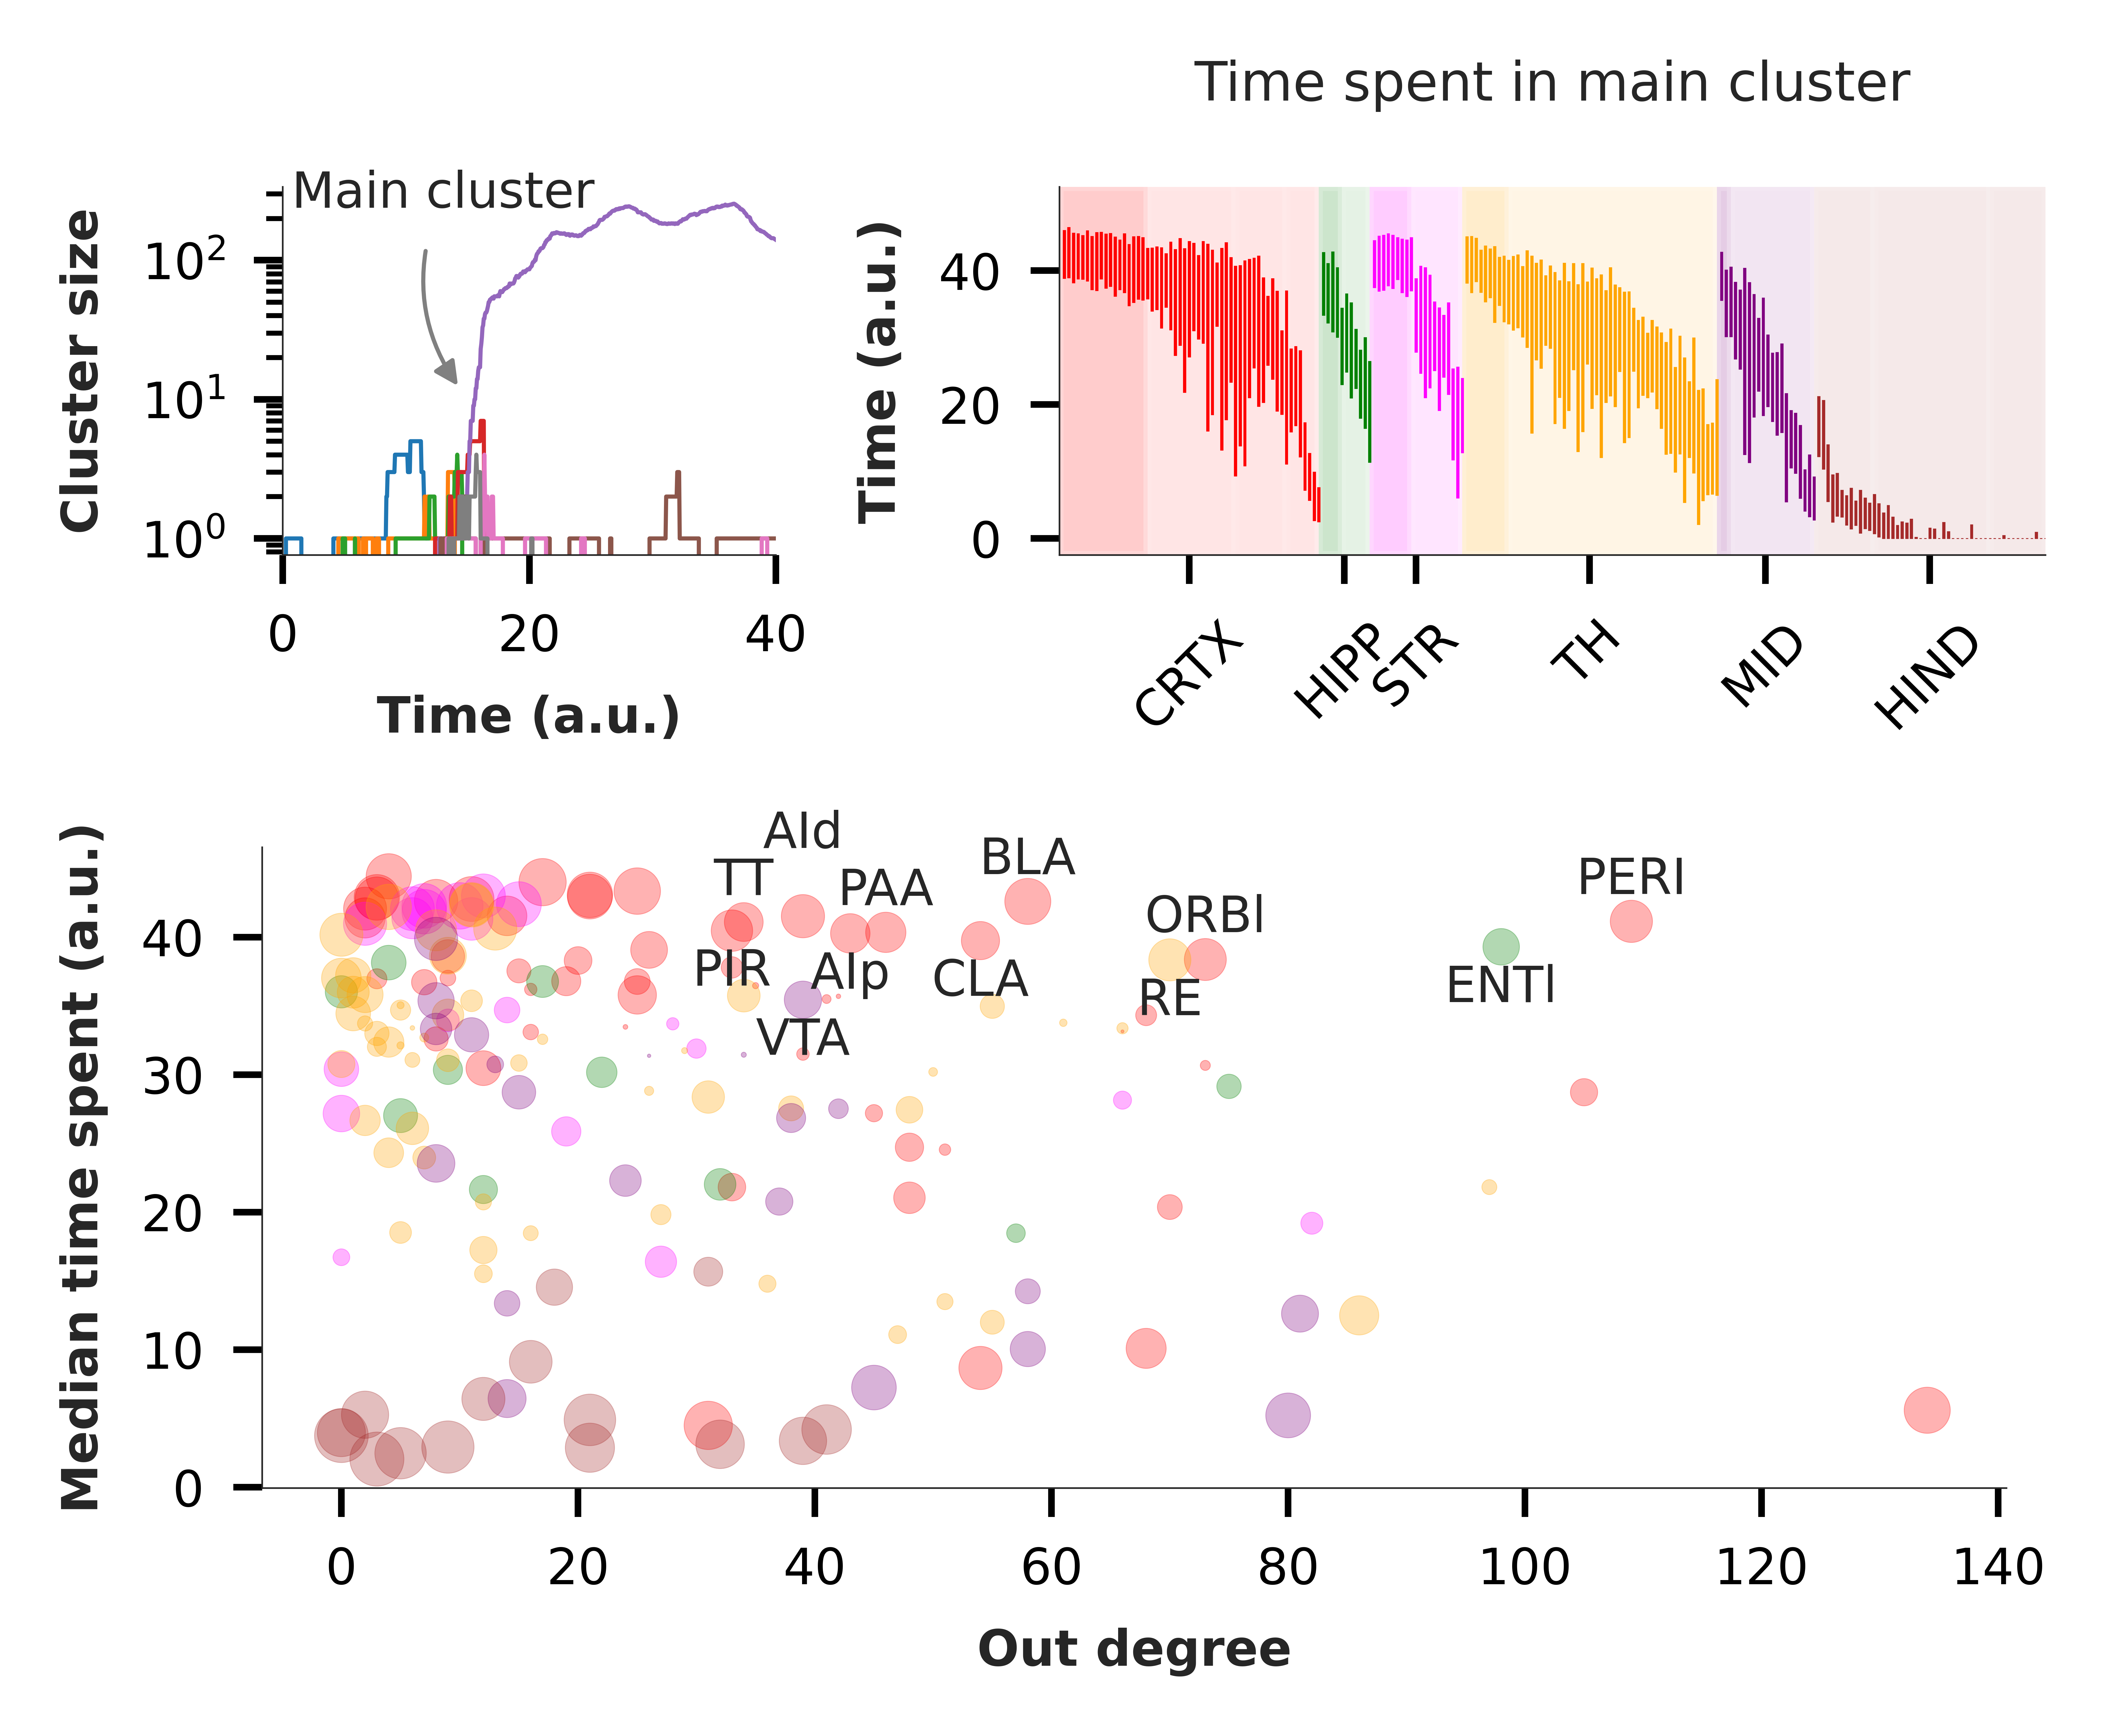

In [17]:
import seaborn as sns
# sns.set_style("dark")
sns.set_style("white", {"axes.labelsize": 12})

style_dict = sns.axes_style()
style_dict['xtick.bottom'] = True
style_dict['ytick.left'] = True
style_dict['xtick.color'] = '0'
style_dict['ytick.color'] = '0'
sns.set_style(style_dict)

import matplotlib

fig = plt.figure(figsize=(3.42, 2.8), dpi=2000)
fig.set_constrained_layout(True)

subfigs = fig.subfigures(2, 1, height_ratios=[0.8, 1]) #hspace=0.05

gs2 = GridSpec(1, 2, figure=subfigs[0], width_ratios=[1, 2]) #hspace=0.1, wspace=-0.2

ax1 = subfigs[0].add_subplot(gs2[0])
ax2 = subfigs[0].add_subplot(gs2[1])

gs2 = GridSpec(1, 1, figure=subfigs[1])

ax3 = subfigs[1].add_subplot(gs2[0]) 


DT = 0.05
nepochs = len(theta_1)


"""
----------------------------------------------------------------------------
Cluster formation
----------------------------------------------------------------------------
"""

# trans = mtransforms.ScaledTranslation(-60/72, 7/72, fig.dpi_scale_trans)
# ax1.text(0.0, 1.0, 'a)', transform=ax1.transAxes + trans, va='bottom', fontweight='bold')


idx = 23 #22 #14 
# ax1.set_title("Synchronization \n cluster", y=1.1) #"Threshold=0.5"
for i in range(MIN_CLUSTER_ID, MAX_CLUSTER_ID):
    if np.max(COUNT_PER_COMMUNITY_1[idx, :, i]) > 2:
        ax1.plot(np.linspace(0, window_size-1, window_size)*DT, 
                 COUNT_PER_COMMUNITY_1[idx, :,i], linewidth=LINE_WIDTH*0.5, label=""+str(i))
    
ax1.set_xlabel("Time (a.u.)", weight='bold')
ax1.set_ylabel("Cluster size", weight='bold')
ax1.set_yscale('log')
ax1.set_xlim(0, 40)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

arpr = arrowprops={'arrowstyle': '-|>', "color":"grey", 
                   'connectionstyle': 'arc3,rad=0.3', 'linewidth': LINE_WIDTH*0.5 }
ax1.annotate('Main cluster', xy=(15, 10), #xy=(20, 100), #xy=(20, 120)
            xytext=(13, 300), #xytext=(35, 10), #xytext=(11, 220)
            va='center', 
            ha='center',
            rotation=0,
            arrowprops=arpr)

"""
----------------------------------------------------------------------------
Time spent in cluster
----------------------------------------------------------------------------
"""
time_spent_in_main_sync_cluster_filtered = TIME_SPENT_IN_MAIN_SYNC_CLUSTER_1[:, 0:mb_atlas.N_REGIONS_WHOLE_BRAIN//2]*DT
time_spent_in_main_sync_cluster_ordered = time_spent_in_main_sync_cluster_filtered[:, ordered_nodes_by_coarser_groups]
colors_ordered = mb_atlas.NODE_ANATOMICAL_AREA_COLOR[ordered_nodes_by_coarser_groups]

# Sort in increasing order of median
mean_time_spent_for_ordered_nodes = np.median(time_spent_in_main_sync_cluster_ordered, axis=0)

# Region-wise sorting
sorted_indices = []
prev_idx = 0
for count in mb_atlas.NODE_COUNT_PER_AREA:
    idxes = prev_idx + np.argsort(mean_time_spent_for_ordered_nodes[prev_idx:(prev_idx + count)])[::-1]
    prev_idx = prev_idx + count
    sorted_indices.extend(idxes)

boxprops = dict(linewidth=LINE_WIDTH*0.1)
box_plot = ax2.boxplot(time_spent_in_main_sync_cluster_ordered[:, sorted_indices],
                       showfliers=False, patch_artist=True, 
                       boxprops=boxprops,
                       medianprops={'visible': False, 'linewidth': LINE_WIDTH*0.1}, 
                       whiskerprops={'visible': False, 'linewidth': LINE_WIDTH*0.1}, 
                       capprops={'visible': False, 'linewidth': LINE_WIDTH*0.1},
                       flierprops={'visible': False, 'linewidth': LINE_WIDTH*0.1})

ax2.set_xticks([])

for idx, box in enumerate(box_plot['boxes']):
    box.set_color(colors_ordered[idx])
    box.set_facecolor(colors_ordered[idx])
    box.set_edgecolor(colors_ordered[idx])

for idx, whisker in enumerate(box_plot['whiskers']):
    if idx%2 == 0:
        whisker.set(color=colors_ordered[idx//2])
    else:
        whisker.set(color=colors_ordered[idx//2])
        
ax2.set_title("Time spent in main cluster", y=1.1)
ax2.set_ylabel("Time (a.u.)", weight='bold')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ticks = []
for idx, cnt in enumerate(mb_atlas.NODE_COUNT_PER_AREA):
    start_idx = sum(mb_atlas.NODE_COUNT_PER_AREA[0:idx])
    pos = start_idx + cnt/2
    ticks.append(pos)

ax2.set_xticks(ticks)
ax2.set_xticklabels(mb_atlas.COARSER_WB_ANATOMICAL_AREAS, 
                    rotation=45)

group_color = mb_atlas.WB_AREAS_COLOR_ORDERED_BY_COARSER_GROUP
# Add a color band for the first 40 values
# cortical
ax2.axvspan(0, 19, facecolor=group_color[0], alpha=0.2) #19
ax2.axvspan(19, 38, facecolor=group_color[0], alpha=0.1)
ax2.axvspan(38, 49, facecolor=group_color[1], alpha=0.1)
ax2.axvspan(49, 56, facecolor=group_color[2], alpha=0.1)

#hippocampus
ax2.axvspan(56, 61, facecolor=group_color[3], alpha=0.2) #6
ax2.axvspan(61, 67, facecolor=group_color[3], alpha=0.1)

# striatum
ax2.axvspan(67, 76, facecolor=group_color[4], alpha=0.2) #9
ax2.axvspan(76, 87, facecolor=group_color[5], alpha=0.1)

#thalamus/hypothalamus
ax2.axvspan(87, 97, facecolor=group_color[6], alpha=0.2) #10
ax2.axvspan(97, 142, facecolor=group_color[7], alpha=0.1)

# midbrain
ax2.axvspan(142, 145, facecolor=group_color[8], alpha=0.2) #3
ax2.axvspan(145, 163, facecolor=group_color[8], alpha=0.1)

# hindbrain
ax2.axvspan(163, 176, facecolor=group_color[9], alpha=0.1) #0
ax2.axvspan(176, 201, facecolor=group_color[10], alpha=0.1)
ax2.axvspan(201, 213, facecolor=group_color[11], alpha=0.1)

ax2.set_xlim(0, 213)


"""
----------------------------------------------------------------------------
Important nodes
----------------------------------------------------------------------------
"""
show_important_nodes(ax3, DT)

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
# ax7.spines['top'].set_visible(False)
# ax7.spines['right'].set_visible(False)

plt.savefig("Figure 5.jpg", format='jpeg')

plt.show()

#### Supplementary Figure

In [49]:
time_spent_in_main_sync_cluster_filtered = TIME_SPENT_IN_MAIN_SYNC_CLUSTER_1[:, 0:mb_atlas.N_REGIONS_WHOLE_BRAIN//2]*DT
median_time_spent = np.median(time_spent_in_main_sync_cluster_filtered, axis=0)
var_in_time_spent = np.var(time_spent_in_main_sync_cluster_filtered, axis=0)
out_degree = mb_atlas.OUT_DEGREE[0:mb_atlas.N_REGIONS_WHOLE_BRAIN//2]
color = mb_atlas.NODE_ANATOMICAL_AREA_COLOR[0:mb_atlas.N_REGIONS_WHOLE_BRAIN//2]
std_dev = np.sqrt(var_in_time_spent)

node_index = []
for idx, time in enumerate(median_time_spent):
    if (median_time_spent[idx] > 35) and (std_dev[idx] < 7) and (idx >= 142) and (idx < 163):
        node_index.append(idx)

len(node_index)

3

In [50]:
time_spent_in_main_sync_cluster_filtered = TIME_SPENT_IN_MAIN_SYNC_CLUSTER_1[:, 0:mb_atlas.N_REGIONS_WHOLE_BRAIN//2]*DT
median_time_spent = np.median(time_spent_in_main_sync_cluster_filtered, axis=0)
var_in_time_spent = np.var(time_spent_in_main_sync_cluster_filtered, axis=0)
out_degree = mb_atlas.IN_DEGREE[0:mb_atlas.N_REGIONS_WHOLE_BRAIN//2]
color = mb_atlas.NODE_ANATOMICAL_AREA_COLOR[0:mb_atlas.N_REGIONS_WHOLE_BRAIN//2]
std_dev = np.sqrt(var_in_time_spent)
alphas = ( np.max(std_dev) - std_dev )/np.max(std_dev)

In [51]:
x_coordinate_imp_nodes = []
y_coordinate_imp_nodes = []
node_index = []

for idx, time in enumerate(median_time_spent):
    if median_time_spent[idx] > 35 and std_dev[idx] < 6.9 and out_degree[idx] > 30:
        x_coordinate_imp_nodes.append(out_degree[idx])
        y_coordinate_imp_nodes.append(median_time_spent[idx])
        node_index.append(idx)
print("done")

for i in range(len(node_index)):
    if i%2 == 0:
        y_coordinate_imp_nodes[i] = y_coordinate_imp_nodes[i] + 2
    else:
        y_coordinate_imp_nodes[i] = y_coordinate_imp_nodes[i] - 2

done


In [63]:
f = plt.figure(figsize=(3.42, 2), dpi=1000)
# plt.hexbin(variability, median_time_spent, C=degree, gridsize=50, cmap='hot', mincnt=1)
plt.scatter(out_degree, median_time_spent, c=color, alpha=0.2, s=0.15*(25*alphas)**2)
plt.xlabel("In degree")
plt.ylabel("Median time spent")

for idx, node_idx in enumerate(node_index):
    plt.text(x_coordinate_imp_nodes[idx], 
             y_coordinate_imp_nodes[idx], 
             mb_atlas.LABELS_WB[node_idx], ha='center', va='center')
plt.show()